In [1]:
# ===========================================
# 📊 CELL 1 — Import and Load Cleaned Datasets
# ===========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)
sns.set_style("whitegrid")

# Load cleaned datasets
data_path = '../data/home-credit-default-risk/'
app = pd.read_csv(data_path + 'application_train_cleaned.csv')
bureau = pd.read_csv(data_path + 'bureau_cleaned.csv')
prev = pd.read_csv(data_path + 'previous_application_cleaned.csv')

print("✅ Cleaned datasets loaded successfully")
print(f"Application: {app.shape}")
print(f"Bureau: {bureau.shape}")
print(f"Previous Applications: {prev.shape}")


✅ Cleaned datasets loaded successfully
Application: (307511, 105)
Bureau: (1716428, 17)
Previous Applications: (1670214, 35)


In [2]:
# ===========================================
# 🧩 CELL 2 — Inspect and Describe Data
# ===========================================

print("Application dataset info:")
app.info()

print("\nBasic statistics for numeric columns:")
display(app.describe().T.head(15))


Application dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 105 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(88), int64(2), object(15)
memory usage: 246.3+ MB

Basic statistics for numeric columns:


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307511.0,27108.487841,14493.461065,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307511.0,538316.294367,369288.982246,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.00000,-19682.000000,-15750.00000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.00000,-2760.000000,-1213.00000,-289.000000,3.652430e+05


C:\Users\user\AppData\Local\Temp\ipykernel_22492\1801169279.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=app, palette='Set2')


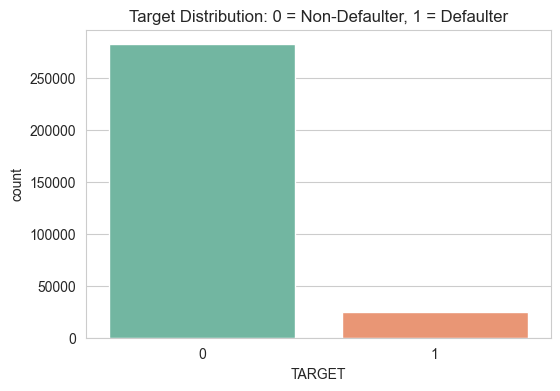

Default rate: 8.07%


In [3]:
# ===========================================
# ⚖️ CELL 3 — Target Variable Analysis
# ===========================================

plt.figure(figsize=(6,4))
sns.countplot(x='TARGET', data=app, palette='Set2')
plt.title("Target Distribution: 0 = Non-Defaulter, 1 = Defaulter")
plt.show()

default_rate = app['TARGET'].mean() * 100
print(f"Default rate: {default_rate:.2f}%")


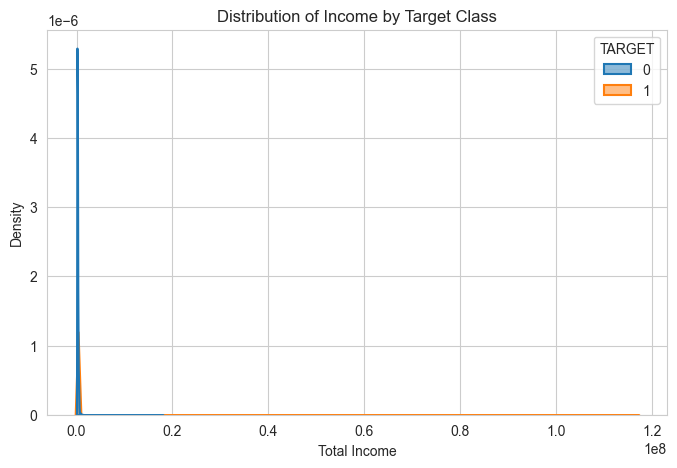

In [4]:
# ===========================================
# 💰 CELL 4 — Income vs Credit Amount
# ===========================================

plt.figure(figsize=(8,5))
sns.kdeplot(
    data=app, x='AMT_INCOME_TOTAL',
    hue='TARGET', fill=True, common_norm=False,
    alpha=0.5, linewidth=1.5
)
plt.title("Distribution of Income by Target Class")
plt.xlabel("Total Income")
plt.show()


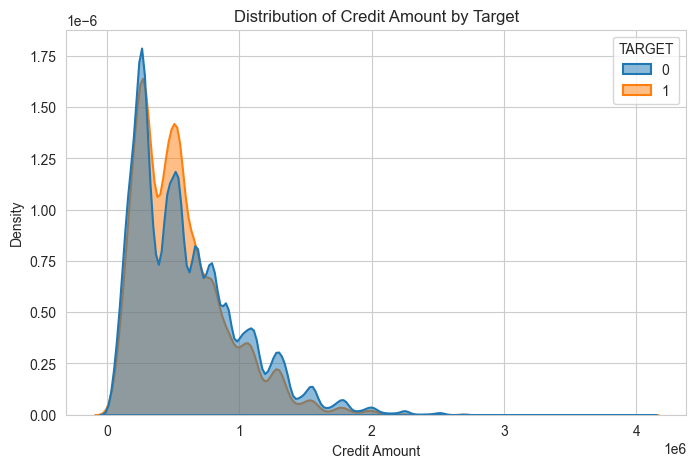

In [5]:
# ===========================================
# 🏠 CELL 5 — Credit Amount by Target
# ===========================================

plt.figure(figsize=(8,5))
sns.kdeplot(
    data=app, x='AMT_CREDIT',
    hue='TARGET', fill=True, common_norm=False,
    alpha=0.5, linewidth=1.5
)
plt.title("Distribution of Credit Amount by Target")
plt.xlabel("Credit Amount")
plt.show()


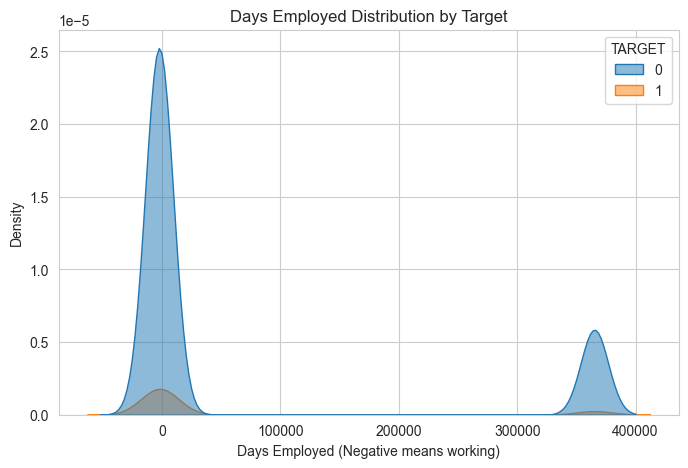

In [6]:
# ===========================================
# 👨‍💼 CELL 6 — Employment Duration vs Target
# ===========================================

plt.figure(figsize=(8,5))
sns.kdeplot(
    data=app, x='DAYS_EMPLOYED', hue='TARGET', fill=True, alpha=0.5
)
plt.title("Days Employed Distribution by Target")
plt.xlabel("Days Employed (Negative means working)")
plt.show()


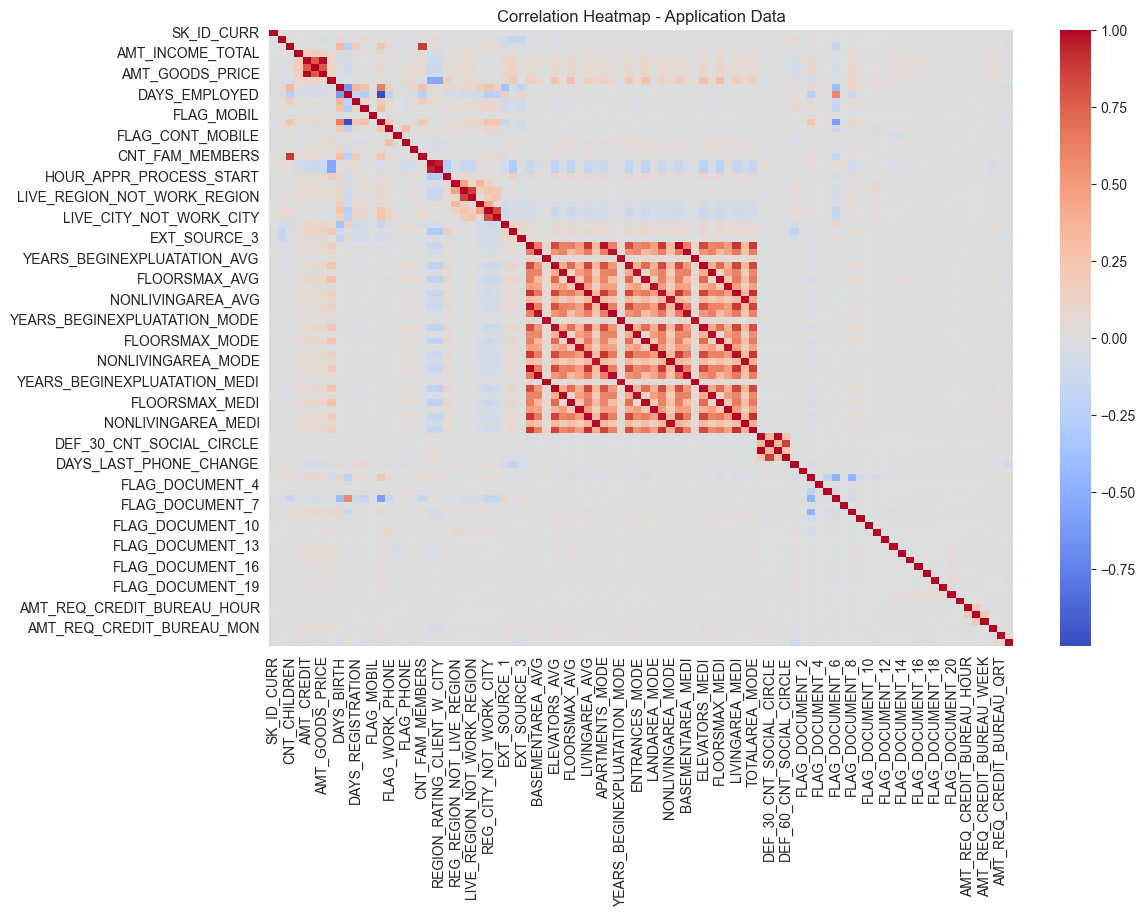

In [7]:
# ===========================================
# 🔍 CELL 7 — Correlation Heatmap
# ===========================================

plt.figure(figsize=(12,8))
corr = app.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap - Application Data")
plt.show()


In [8]:
# ===========================================
# 🧠 CELL 8 — Top Correlations with TARGET
# ===========================================

corr_target = corr['TARGET'].sort_values(ascending=False)
print("Top Positive Correlations with TARGET:")
display(corr_target.head(10))

print("\nTop Negative Correlations with TARGET:")
display(corr_target.tail(10))


Top Positive Correlations with TARGET:


TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64


Top Negative Correlations with TARGET:


ELEVATORS_AVG                -0.035853
REGION_POPULATION_RELATIVE   -0.037227
FLOORSMAX_MODE               -0.038377
FLOORSMAX_MEDI               -0.039157
FLOORSMAX_AVG                -0.039385
AMT_GOODS_PRICE              -0.039623
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.098887
EXT_SOURCE_3                 -0.155892
EXT_SOURCE_2                 -0.160295
Name: TARGET, dtype: float64